# McsPyDataTools IMU Tutorial<a id='Top'></a>

- <a href='#Gyrosocope Data'>Gyroscope Data</a>
- <a href='#Accelerometer Data'>Accelerometer Data</a>

Tutorial to show the handling of IMU data collected from an MCS Headstage wearing an *Inertial Measurement Unit*

Load module and the data file:

In [43]:
import sys
sys.path.append(r"../McsPyDataTools")
sys.executable

'C:\\ProgramData\\Anaconda3\\python.exe'

In [44]:
# These are the imports of the McsData module
import McsPy.McsData
import McsPy.functions_info
from McsPy import ureg, Q_

# matplotlib.pyplot will be used in these examples to generate the plots visualizing the data
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.widgets import Slider
# These adjustments only need to be made so that the plot gets displayed inside the notebook
%matplotlib inline
# %config InlineBackend.figure_formats = {'png', 'retina'}

# numpy is numpy ...
import numpy as np
import McsPy.functions_info as fi

Check the content of the data file folder:

In [45]:
fi.print_dir_file_info(".\\TestData")

invalid literal for int() with base 10: ''
File                                             Date                   Anal.    Ev    Seg.    TS    FS
-----------------------------------------------  -------------------  -------  ----  ------  ----  ----
2014-07-09T10-17-35W8 Standard all 500 Hz.h5     2014-07-09 10:17:35        3     1       1     1     0
2017-10-11T13-39-47McsRecording_X981_AccGyro.h5  2017-10-11 13:39:47        6     0       0     0     0
AnalogSegmentTimestamp.h5                        2014-07-25 11:30:56        1     0       1     1     0
AverageEvent.h5                                  2015-04-02 16:04:26        0     0       1     0     0
CMOSTestRec.h5                                   2014-11-04 10:24:32        0     0       0     0     1
Retina.h5                                        2016-05-17 15:34:05        0     0       0     0     1


Check what's inside the file:

In [46]:
acc_gyro_raw_data_file_path = ".\\TestData\\2017-10-11T13-39-47McsRecording_X981_AccGyro.h5"
fi.print_file_info(acc_gyro_raw_data_file_path)


.\TestData\2017-10-11T13-39-47McsRecording_X981_AccGyro.h5

Date                 Program                     Version
-------------------  --------------------------  ------------
2017-10-11 13:39:47  Multi Channel Experimenter  2.6.90.17257

Type    Stream                                         # ch
------  -------------------------------------------  ------
Analog  Data Acquisition (1) Quality Sideband Data1       1
Analog  Data Acquisition (1) Electrode Raw Data1         32
Analog  Data Acquisition (1) Analog Data1                 1
Analog  Data Acquisition (1) Digital Data1                1
Analog  Data Acquisition (1) Gyroscope Data1              3
Analog  Data Acquisition (1) Accelerometer Data1          3


Load the file in silent mode:

In [47]:
McsPy.McsData.VERBOSE = False
raw_data = McsPy.McsData.RawData(acc_gyro_raw_data_file_path)

## Gyroscope Data<a id='Gyroscope Data'></a>

In [48]:
gyro_channel = raw_data.recordings[0].analog_streams[4]
print('Channel IDs: %s' % gyro_channel.channel_infos.keys())

Channel IDs: dict_keys([148, 149, 150])


In [49]:
gyro = np.transpose(gyro_channel.channel_data)
gyro.shape

(16400, 3)

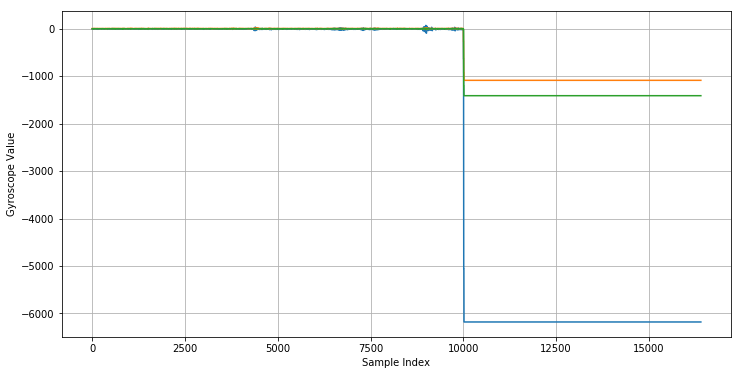

In [50]:
plt.figure(figsize=(12,6))
plt.plot(gyro)
#plt.title('Signal for Wireless (Simulation) / Raw ADC-Values (%s)' % analog_stream_0.label)
plt.xlabel('Sample Index')
plt.ylabel('Gyroscope Value')
plt.grid()

plt.show()

Cutout invalid data parts:

In [51]:
gyro = gyro[0:10000,0:3]
gyro.shape

(10000, 3)

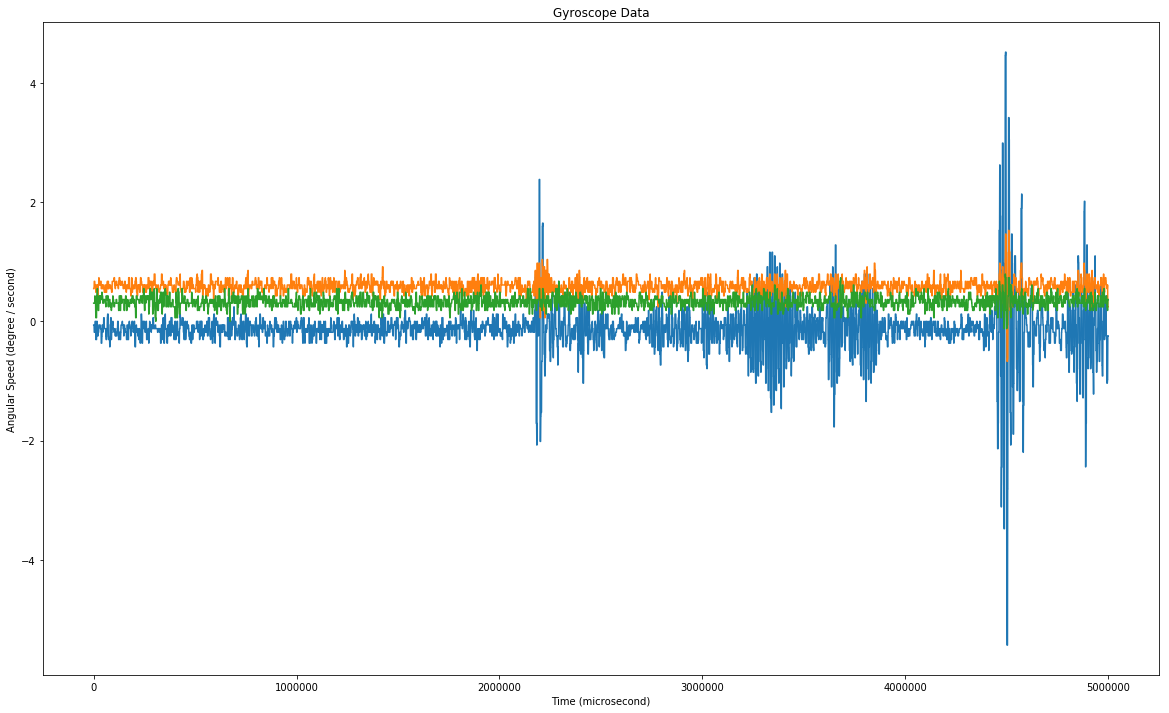

In [52]:
time = gyro_channel.get_channel_sample_timestamps(148,0,10000)
gyro_x = gyro_channel.get_channel_in_range(148,0,10000)
gyro_y = gyro_channel.get_channel_in_range(149,0,10000)
gyro_z = gyro_channel.get_channel_in_range(150,0,10000)
plt.figure(figsize=(20,12))
plt.plot(time[0], gyro_x[0])
plt.plot(time[0], gyro_y[0])
plt.plot(time[0], gyro_z[0])
plt.xlabel('Time (%s)' % time[1])
plt.ylabel('Angular Speed (%s)' % gyro_x[1])
plt.title('Gyroscope Data')
plt.show()

## Accelerometer Data<a id='Accelerometer Data'></a>

In [53]:
acc_channel = raw_data.recordings[0].analog_streams[5]
print('Channel IDs: %s' % acc_channel.channel_infos.keys())

Channel IDs: dict_keys([160, 161, 162])


In [54]:
acc = np.transpose(acc_channel.channel_data)
acc.shape

(16400, 3)

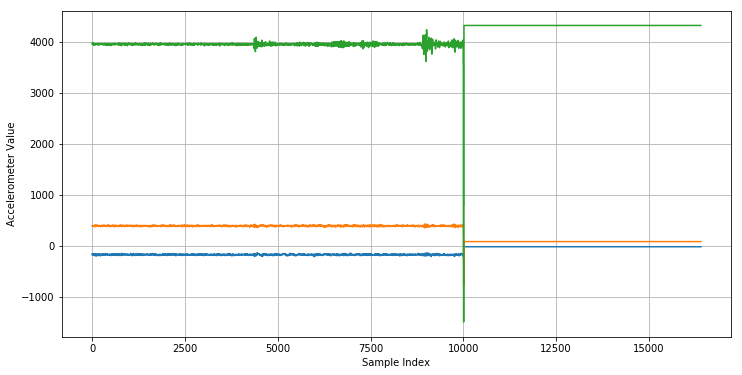

In [55]:
plt.figure(figsize=(12,6))
plt.plot(acc)
#plt.title('Signal for Wireless (Simulation) / Raw ADC-Values (%s)' % analog_stream_0.label)
plt.xlabel('Sample Index')
plt.ylabel('Accelerometer Value')
plt.grid()

plt.show()

Cutout invalid data parts:

In [56]:
acc = acc[0:10000,0:3]
acc.shape

(10000, 3)

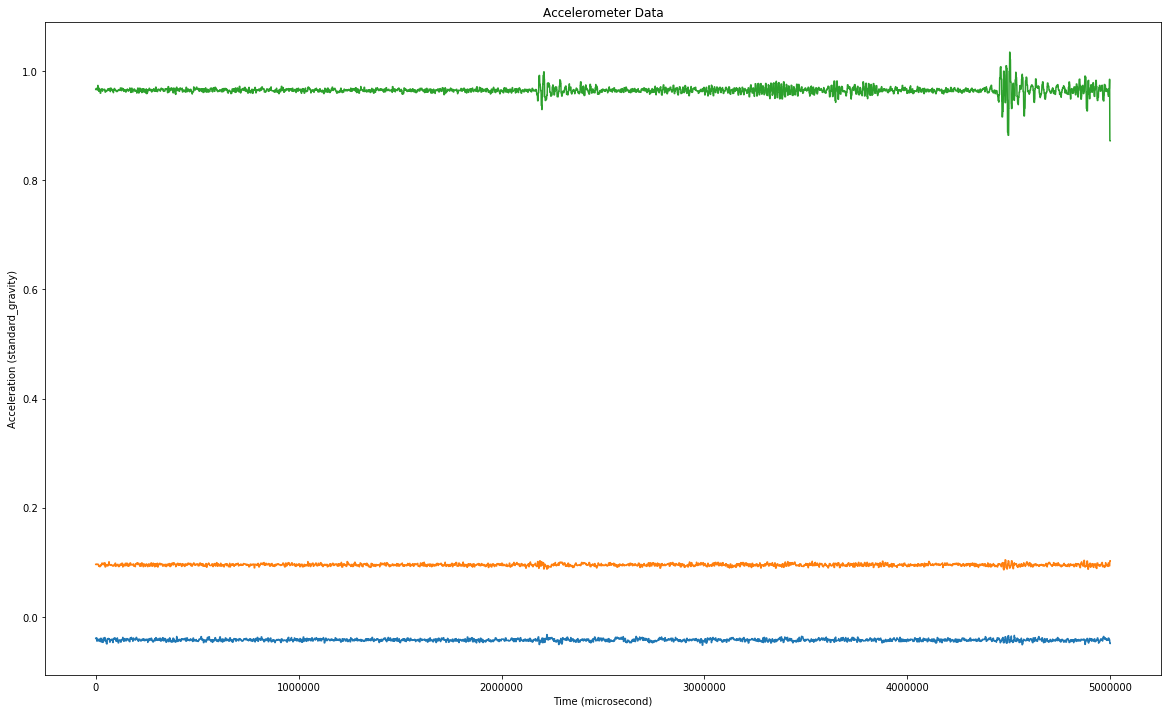

In [57]:
time = acc_channel.get_channel_sample_timestamps(160,0,10000)
acc_x = acc_channel.get_channel_in_range(160,0,10000)
acc_y = acc_channel.get_channel_in_range(161,0,10000)
acc_z = acc_channel.get_channel_in_range(162,0,10000)
plt.figure(figsize=(20,12))
plt.plot(time[0], acc_x[0])
plt.plot(time[0], acc_y[0])
plt.plot(time[0], acc_z[0])
plt.xlabel('Time (%s)' % time[1])
plt.ylabel('Acceleration (%s)' % acc_x[1])
plt.title('Accelerometer Data')
plt.show()

<a href='#Top'>Back to index</a>